## Abstract
The Modified National Institute of Standards and Technology (MNIST) compiled an open-source dataset containing thousands of label-feature pairs as shown below. Each image is represented by a 28x28 pixel grid, which we will be classifying as a 2-D array of integers with hex values of 0 (for black) and 255 (for white).  Our goal is to train a supervised learning model to predict the numeric value of a pixelated image. 

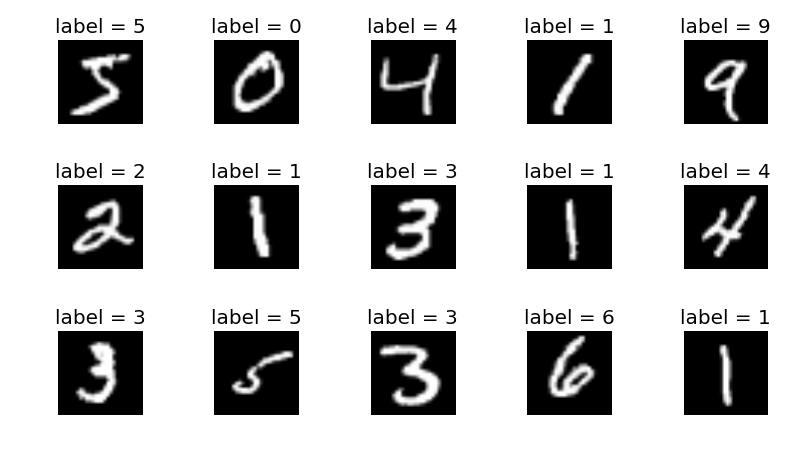

# CODE

## **Importing Libraries and Data**

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # loading dataset

In [18]:
print('training set cardinality: ' + str(len(x_train)))
print('test set cardinality: ' + str(len(x_test)))

training set cardinality: 60000
test set cardinality: 10000


## **Preparing Data** 

In [40]:
x_train = x_train / 255
x_test = x_test / 255
# scaling values

In [41]:
x_train_1d = x_train.reshape(len(x_train), 784) # flattening x train and x test to a 1d array of 28x28 (784) pixels.
x_test_1d = x_test.reshape(len(x_test), 784)

## **Creating and Training Model**

We will be training the neurons using sigmoid activation function, graphically represented below. Furthermore, we will use a hidden layer to increase accuracy and speed of model training. 

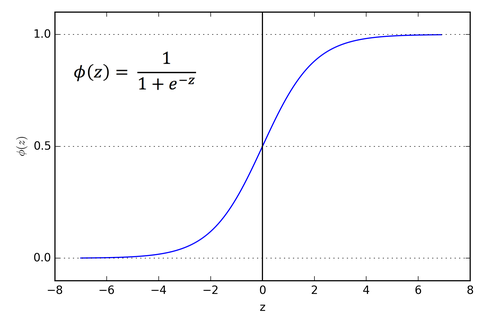

In [81]:
model = keras.Sequential([ keras.layers.Dense(16, input_shape=(784,), activation='sigmoid'),
                          keras.layers.Dense(10, activation='sigmoid')]) 
# creating a stack data structure of the layers for our NN

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_1d, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8173 - accuracy: 0.8190
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3362 - accuracy: 0.9122
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2712 - accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2410 - accuracy: 0.9314
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2224 - accuracy: 0.9361


After 5 epochs, or iterations of training, our model yields 93.61% accuracy in reading digits. 

## **Testing Model**

7310


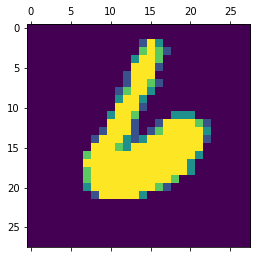

In [79]:
import random
random_num = random.randint(0, 10000)
plt.matshow(x_test[random_num])
print(random_num)

In [80]:
y_pred = model.predict(x_test_1d)
np.argmax(y_pred[random_num])

6

## **Presenting Model**


In [84]:
y_pred_labels = [np.argmax(i) for i in y_pred]
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
conf_matrix

Text(69.0, 0.5, 'Actual Digit')

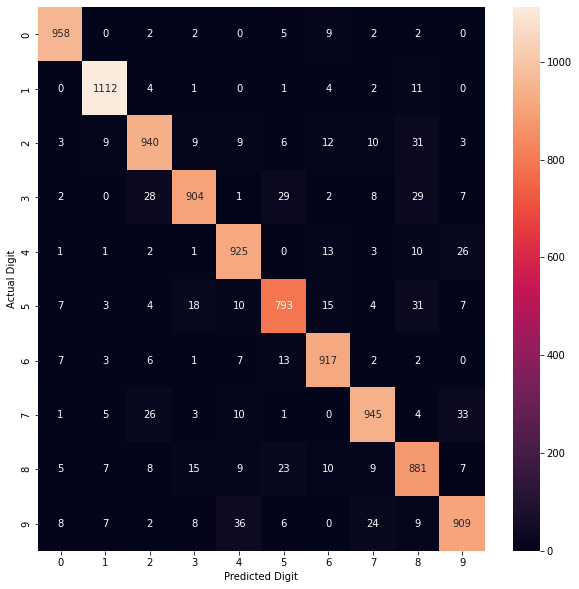

In [87]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Digit')
plt.ylabel('Actual Digit')

## **Conclusions**

Our model, with two hidden layers, operates at approximately 94% accuracy. Each neuron is modeled with a sigmoid activation function. The heatmap shows that there are still some outliers and inaccurate predictions. We can assume that other activation functions and more hidden layers could be added to boost the model's prediction accuracy of handwritten digits.
